<a href="https://colab.research.google.com/github/Patel-Chandresh/Patel-Chandresh/blob/main/LSTM_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install nselib

In [44]:
import numpy as np
import pandas as pd
import nselib
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from nselib import capital_market
from nselib import derivatives
import yfinance as yf
import locale
yf.pdr_override()

In [ ]:
#capital_market.price_volume_data('SBIN', period = '1W')
#start_date = '01-01-2019'
#end_date = '22-03-2024'
#name_stock = 'TATASTEEL'
#df = capital_market.price_volume_and_deliverable_position_data(symbol = name_stock, from_date = start_date, to_date = end_date)
#df = df[df.columns[[4,5,6,8]]]
#df

In [ ]:
!pip install yfinance

In [55]:
start_ = '2010-01-01'
end_ = '2024-03-22'
ticker_ = 'SBIN.NS'

#df = data.DataReader('AAPL', 'yahoo', start, end)
df = wb.get_data_yahoo(ticker_, start=start_, end=end_)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,195.716751,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,195.789368,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,196.963928,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,195.861969,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,195.276871,10453820


In [ ]:
df = df.reset_index()
#df.head()

In [ ]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

In [ ]:
plt.plot(df.Close)

In [59]:
ma100 = df.Close.rolling(100).mean()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3505    644.954503
3506    646.552003
3507    648.159003
3508    649.992003
3509    651.873002
Name: Close, Length: 3510, dtype: float64

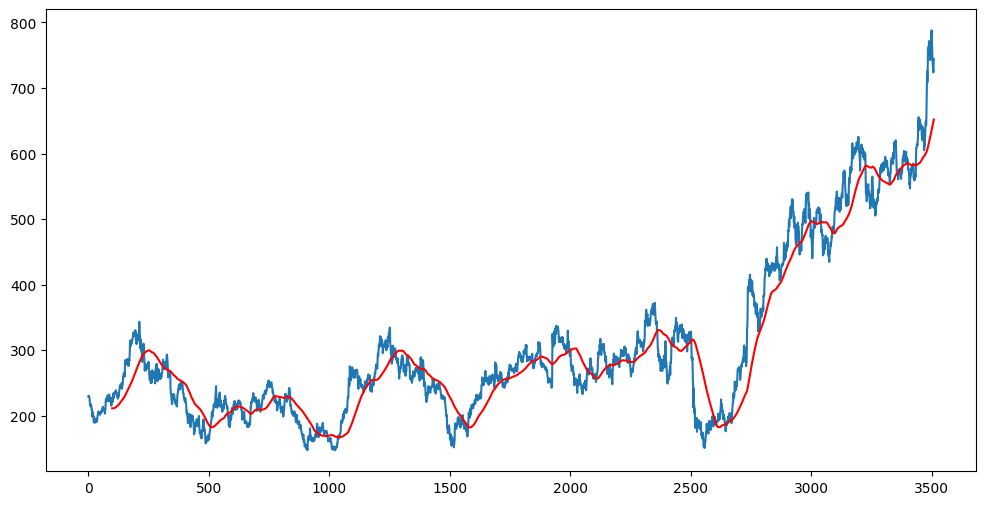

In [60]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
#ma200

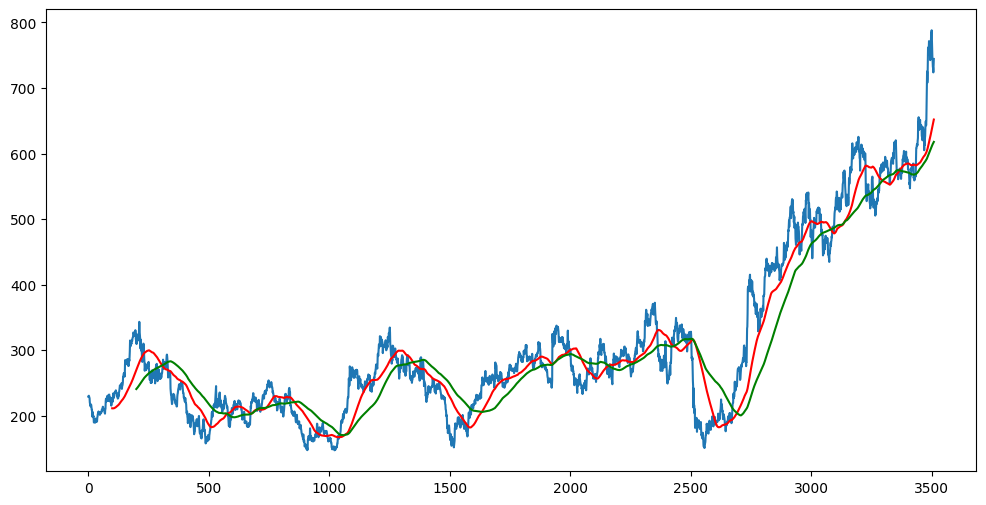

In [63]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [64]:
df.shape

(3510, 5)

In [68]:
#Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
#data_training.shape

(2457, 1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.36331318],
       [0.36369092],
       [0.36980094],
       ...,
       [0.80336828],
       [0.84647179],
       [0.82225382]])

In [72]:
data_training_array.shape

(2457, 1)

In [75]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [74]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [77]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape = [x_train.shape[1],1]))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [79]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 [==============================] - 26s 270ms/step - loss: 0.0397
Epoch 2/50
74/74 [==============================] - 19s 253ms/step - loss: 0.0119
Epoch 3/50
74/74 [==============================] - 20s 274ms/step - loss: 0.0102
Epoch 4/50
74/74 [==============================] - 22s 304ms/step - loss: 0.0095
Epoch 5/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0087
Epoch 6/50
74/74 [==============================] - 20s 277ms/step - loss: 0.0077
Epoch 7/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0069
Epoch 8/50
74/74 [==============================] - 20s 275ms/step - loss: 0.0071
Epoch 9/50
74/74 [==============================] - 21s 279ms/step - loss: 0.0073
Epoch 10/50
74/74 [==============================] - 19s 259ms/step - loss: 0.0071
Epoch 11/50
74/74 [==============================] - 21s 279ms/step - loss: 0.0056
Epoch 12/50
74/74 [==============================] - 20s 267ms/step - loss: 0.0059
Epoch 13/50
7

In [80]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [81]:
#last 100 data should bring from training data
#data_testing.head()
past_100_days = data_training.tail(100)

In [85]:
#final_df = past_100_days.append(data_testing, ignore_index = True)
final_df = pd.concat([past_100_days, data_testing], axis=0)

In [87]:
final_df.tail()

,Close
3505,731.900024
3506,730.950012
3507,723.799988
3508,736.250000
3509,744.299988


In [88]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.29888573],
       [0.30092593],
       [0.30280915],
       ...,
       [0.89916823],
       [0.91870686],
       [0.93134024]])

In [89]:
input_data.shape

(1153, 1)

In [91]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [92]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [93]:
x_test.shape

(1053, 100, 1)

In [94]:
y_test.shape

(1053,)

In [95]:
# Making Predictions

y_predicted = model.predict(x_test)

33/33 [==============================] - 3s 80ms/step


In [96]:
y_predicted.shape

(1053, 1)

In [97]:
y_test

array([0.28342751, 0.28091652, 0.29252982, ..., 0.89916823, 0.91870686,
       0.93134024])

In [98]:
y_predicted

array([[0.3156299 ],
       [0.31645486],
       [0.31593668],
       ...,
       [0.84632164],
       [0.83957607],
       [0.84144235]], dtype=float32)

In [99]:
scaler.scale_

array([0.00156937])

In [100]:
scale_factor = 1/scaler.scale_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

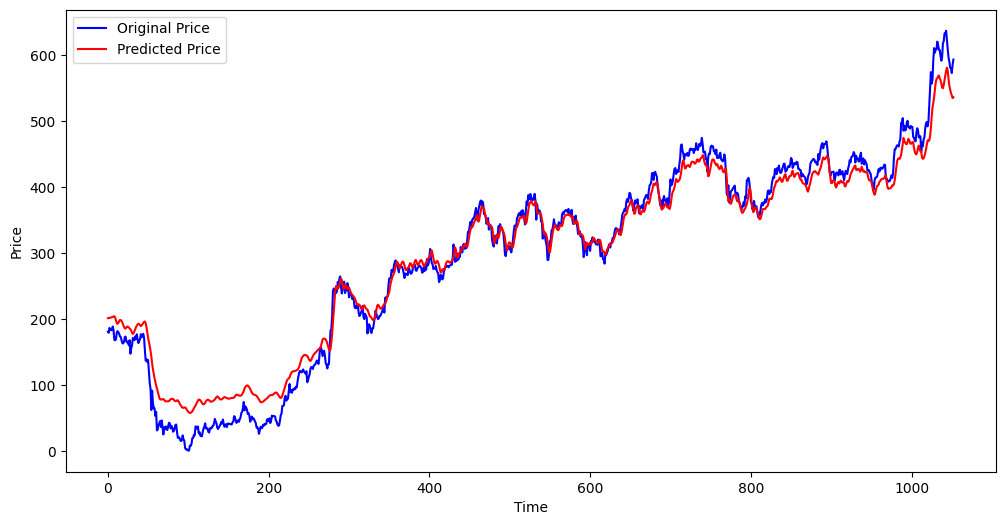

In [101]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()